# Машинное обучение, ФКН ВШЭ

## Практическое задание 1

### Общая информация
Дата выдачи: 07.09.2018  

Мягкий дедлайн: 07:59MSK 15.09.2018 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 16.09.2018  

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [3]:
%pylab inline 
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [4]:
df = pd.read_csv('/Users/alena_naya11_work/Downloads/data.csv')
print('Количество строк:', len(df))
print('Список блюд, заказанных где-то. Cтолбцы - id заказа, количество блюд, название, описание, если есть, и цена.')
print('Типы столбцов:\n', df.dtypes)

df.tail(10)

Количество строк: 4622
Список блюд, заказанных где-то. Cтолбцы - id заказа, количество блюд, название, описание, если есть, и цена.
Типы столбцов:
 order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [5]:
print("Количество заказов в выбоке: ", len(df.order_id.unique()))
print("Количество уникальных категорий товара в выбоке: ", len(df.item_name.unique()))

Количество заказов в выбоке:  1834
Количество уникальных категорий товара в выбоке:  50


#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [6]:
print("Пропуски есть в колонках: ", df.columns[np.unique(np.where(pd.isnull(df))[1])[0]])

Пропуски есть в колонках:  choice_description


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [7]:
for column in df:
    if df[column].dtype == "object":
        df[column].fillna('', inplace=True)
    elif df[column].dtype == "int64":
        df[column].fillna(0, inplace=True)
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [8]:
print("Существующий тип колонки с ценой: ", df.item_price.dtype)
df['item_price_int64'] = df.item_price.apply(lambda x: float((x[1:])))

Существующий тип колонки с ценой:  object


Какая средняя/минимальная/максимальная цена у товара? 

In [9]:
df["item_pure_price"] = df.apply(lambda row: row["item_price_int64"] / row["quantity"], axis=1)
print("Минимальная: ", min(df.item_pure_price))
print("Максимальная: ", max(df.item_pure_price))
print("Средняя: ", mean(df.item_pure_price))

Минимальная:  1.09
Максимальная:  11.89
Средняя:  7.084424491562234


Удалите старую колонку с ценой.

In [10]:
 df = df.drop(columns=['item_price'])

#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по choice_description)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [11]:
result = df.drop_duplicates(subset='choice_description', keep="last")
expensive  = result.sort_values(by=['item_pure_price'], ascending=False)
print("The most expensive:")
for row in expensive[:5].values:
    if row[3]:
        print(row[3])
    else:
        print(row[2])
print("\nThe most cheap:")
cheap = result.sort_values(by=['item_pure_price'], ascending=True)
for row in cheap[:5].values:
    if row[3]:
        print(row[3])
    else:
        print(row[2])

The most expensive:
[Tomatillo Red Chili Salsa, [Black Beans, Cheese, Sour Cream, Guacamole]]
[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Cheese, Guacamole, Lettuce]]
[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Guacamole]]
[Tomatillo Red Chili Salsa, [Black Beans, Cheese, Guacamole]]
[Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole]]

The most cheap:
[Dr. Pepper]
[Mountain Dew]
[Diet Dr. Pepper]
[Coca Cola]
[Nestea]


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [12]:
res = 0
for q in df.loc[df['item_name'] == 'Chicken Bowl'].quantity:
    if q > 1:
        res+=1
print(res)

33


#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [13]:
print("Средний чек заказа: $", mean(df.groupby("order_id")['item_price_int64'].sum()))
print("В среднем товаров покупают: ", mean(df.groupby("order_id")['quantity'].sum()))

Средний чек заказа: $ 18.81142857142869
В среднем товаров покупают:  2.711014176663032


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [14]:
res = 0
for q in df.groupby("order_id")['quantity'].sum():
    if q == 1:
        res+=1
print(res)

56


#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [15]:
df.groupby("item_name")["quantity"].sum().sort_values(ascending=False).idxmax()

'Chicken Bowl'

#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [16]:
# print("Видов существует", len(df.loc[df['item_name'] == 'Burrito']))

types = df[df['item_name'].str.contains("Burrito")].groupby('item_name').head(1)["item_name"].values
print("Виды:")
for name in types:
    print(name)
    
most_popular = df[df['item_name'].str.contains("Burrito")].groupby('item_name')["quantity"].sum().sort_values(ascending=False).idxmax()

print("\nЧаще всего покупают:", most_popular)

most_expensive = df[df['item_name'].str.contains("Burrito")].groupby('item_name')["item_price_int64"].head(1).sort_values(ascending=False).idxmax()
most_expensive_name = df.iloc[[most_expensive]].item_name
print("\nСамый дорогой:", most_expensive_name.values[0])

Виды:
Steak Burrito
Chicken Burrito
Barbacoa Burrito
Carnitas Burrito
Veggie Burrito
Burrito

Чаще всего покупают: Chicken Burrito

Самый дорогой: Steak Burrito


#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно средний чек, добавить его в исходные данные и сделать необходимые проверки.

In [17]:
final_sum_df = df.groupby("order_id")['item_price_int64'].sum()
for index, row in df.iterrows():
    df.at[index, 'order_sum'] = final_sum_df.get(row["order_id"])
print(len(df[df.item_price_int64 > (0.4 * df.order_sum)].drop_duplicates(subset="order_id")))

1624


#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [18]:
from copy import deepcopy
diet_cokes = df[df['choice_description'].str.contains("Diet Coke") & (df['item_price_int64']/df['quantity'] == 1.25)]
diet_cokes = deepcopy(diet_cokes)
money_earned_total = df[df['choice_description'].str.contains("Diet Coke")]["item_price_int64"].sum()
money_earned_for_1_25 = diet_cokes.item_price_int64.sum()
diet_cokes["item_price_int64"] = diet_cokes.apply(lambda row: 1.35 * row["quantity"], axis=1)
money_should_be_earned_for_1_35 = diet_cokes.item_price_int64.sum()
money_should_be_earned_total = money_earned_total - money_earned_for_1_25 + money_should_be_earned_for_1_35
print("Должно было быть заработано на", ((money_should_be_earned_total-money_earned_total)/money_earned_total)*100,"% больше")

Должно было быть заработано на 3.5199412322855133 % больше


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [19]:
data = np.random.rand(10, 3)
new_df = pd.DataFrame({'index':data[:,0], 'column1':data[:,1], 'column2':data[:,2]})
new_df.set_index('index', inplace=True)
new_df

,column1,column2
index,,
0.679522,0.195303,0.626145
0.850381,0.263663,0.265878
0.541921,0.967773,0.892801
0.513179,0.260994,0.933177
0.617175,0.077575,0.102113
0.096554,0.728208,0.368490
0.338690,0.495279,0.204255
0.949382,0.491740,0.056025
0.170280,0.572719,0.245897


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [20]:
new_df.to_csv('mydf.csv', sep='\t', header=False, index=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [22]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])

#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

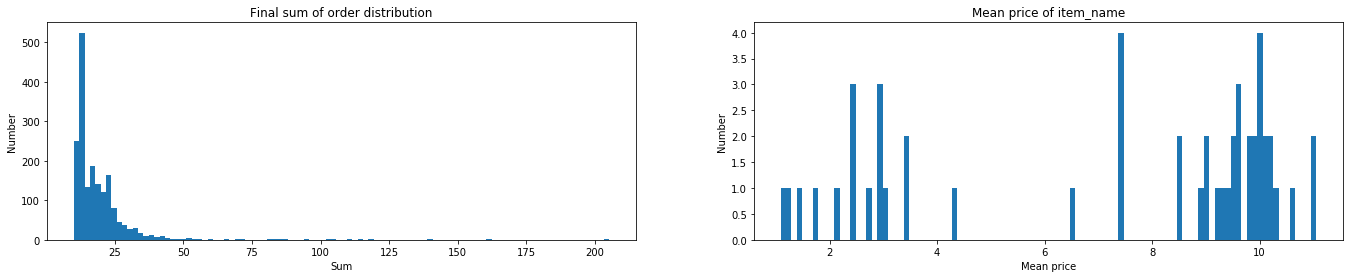

In [23]:
plt.subplot(121)
plt.title('Final sum of order distribution')
plt.ylabel('Number')
plt.xlabel('Sum')
plt.hist(df.groupby('order_id')['item_price_int64'].apply(sum), bins = 100)

plt.subplot(122)
plt.hist(df.groupby('item_name')['item_pure_price'].apply(mean), bins = 100)
plt.title('Mean price of item_name')
plt.ylabel('Number')
plt.xlabel('Mean price')

subplots_adjust(left=1, bottom=None, right=4, top=None,
                wspace=None, hspace=None)

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

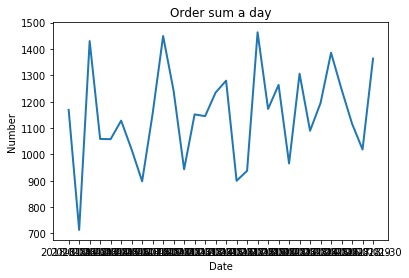

In [24]:
df_new = pd.concat([df.groupby('order_id')['item_price_int64'].apply(sum), dates], axis=1).groupby('date')['item_price_int64'].sum()
plt.plot(df_new.index, df_new, linewidth = 2.0)
plt.title('Order sum a day')
plt.ylabel('Number')
plt.xlabel('Date')
plt.show()

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

Text(0.5,0,'Weekday')

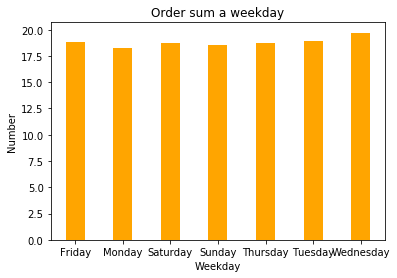

In [25]:
df_new = pd.concat([df.groupby('order_id')['item_price_int64'].apply(sum), dates], axis=1)
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['day'] = df_new['date'].dt.weekday_name

df_new = df_new.groupby('day')['item_price_int64'].apply(mean)
plt.bar(df_new.index, df_new, 0.4, color='orange')
plt.title('Order sum a weekday')
plt.ylabel('Number')
plt.xlabel('Weekday')

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

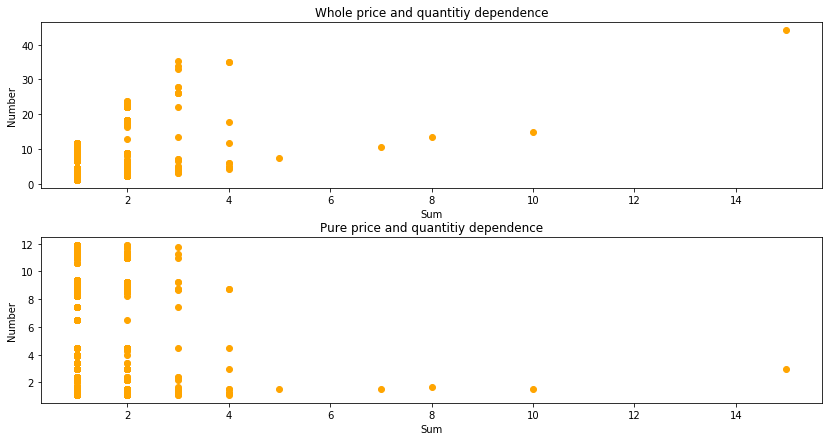

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(df.quantity.values, df.item_price_int64.values, color='orange')
plt.ylabel('Number')
plt.xlabel('Sum')
plt.title('Whole price and quantitiy dependence')

ax2 = fig.add_subplot(2,1,2)
ax2.scatter(df.quantity.values, df.item_pure_price.values, color='orange')
plt.ylabel('Number')
plt.xlabel('Sum')
plt.title('Pure price and quantitiy dependence')

subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.3)

Сохраните график в формате pdf (так он останется векторизованным).

In [51]:
fig.savefig('my_figure.pdf')

Кстати, существует надстройка над matplotlib под названием [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Иногда удобнее и красивее делать визуализации через неё. 